## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

### Lembar Pengerjaan
Lembar pengerjaan dimulai dari cell dibawah ini

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EDA



In [2]:
df = pd.read_csv('data/tweet_emotions.csv')

df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


<AxesSubplot: >

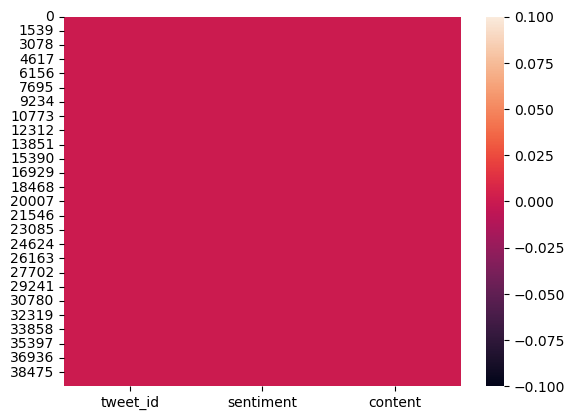

In [3]:
sns.heatmap(df.isna())

In [4]:
df.duplicated().sum()

0

In [5]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot: xlabel='sentiment', ylabel='count'>

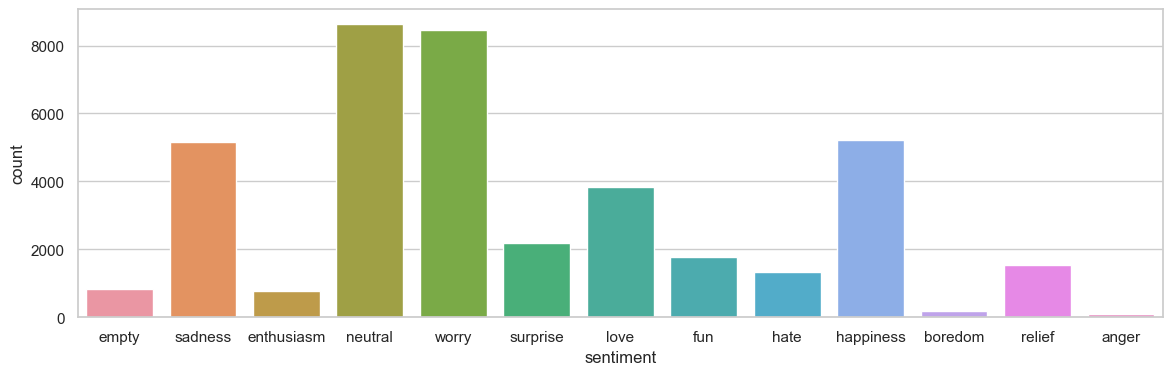

In [6]:
plt.figure(figsize=(14, 4))
sns.set_theme(style="whitegrid")
sns.countplot(x = df['sentiment'])

<AxesSubplot: >

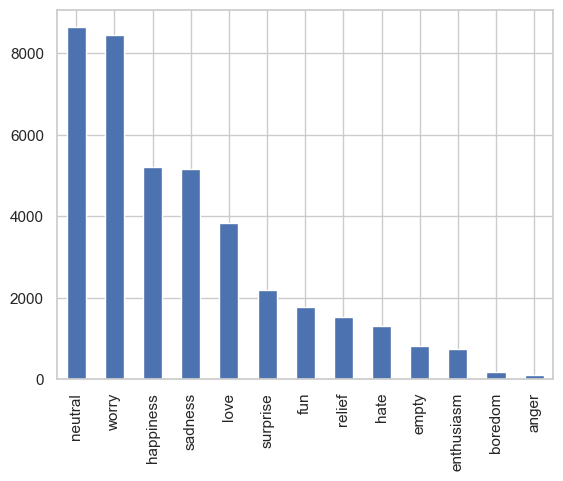

In [7]:
df['sentiment'].value_counts().plot(kind='bar')

In [8]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [9]:

# function to clean the tweets 
import re
def cleanTxt(text):
    text = re.sub(r'@\w+|#\w+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('\w+:\/\/\S+', '', text) # Removing hyperlink
    #remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', text)
    text.lower()
    return text

In [10]:
# case folding
temp = df['content'].str.lower()

In [11]:
# remove hashtag and mention using regex
import re

temp = temp.apply(lambda x: re.sub(r'@\w+|#\w+', '', x))

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998     wassup beautiful!!! follow me!!  peep out my ...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [12]:
# remove url using regex
temp = temp.apply(lambda x: re.sub(r'http\S+', '', x))

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998     wassup beautiful!!! follow me!!  peep out my ...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [13]:
# remove punctuation
import string

temp = temp.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998     wassup beautiful follow me  peep out my new h...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [14]:
# remove duplicate item
temp = temp.drop_duplicates()

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4         we want to trade with someone who has houston...
                               ...                        
39994                          succesfully following tayla
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998     wassup beautiful follow me  peep out my new h...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 39172, dtype: object

In [15]:
# remove number
temp = temp.apply(lambda x: re.sub(r'\d+', '', x))

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4         we want to trade with someone who has houston...
                               ...                        
39994                          succesfully following tayla
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998     wassup beautiful follow me  peep out my new h...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 39172, dtype: object

In [16]:
# check null value
temp.isnull().sum()

0

In [17]:
# remove whitespace
temp = temp.apply(lambda x: x.strip())

temp

0        i know  i was listenin to bad habit earlier an...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4        we want to trade with someone who has houston ...
                               ...                        
39994                          succesfully following tayla
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998    wassup beautiful follow me  peep out my new hi...
39999    bullet train from tokyo    the gf and i have b...
Name: content, Length: 39172, dtype: object

STOPWORDS REMOVAL

In [18]:
#remove stopwords
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')
temp = temp.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4                   want trade someone houston tickets one
                               ...                        
39994                          succesfully following tayla
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 39172, dtype: object

LEMMETIZATION

In [19]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

temp = temp.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                    want hang friend soon
4                    want trade someone houston ticket one
                               ...                        
39994                          succesfully following tayla
39996                                happy mother day love
39997    happy mother day mommy woman man long youre mo...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 39172, dtype: object

TOKENIZATION

In [20]:
# tokenization
from nltk.tokenize import word_tokenize

temp = temp.apply(lambda x: word_tokenize(x))

temp

0        [know, listenin, bad, habit, earlier, started,...
1            [layin, n, bed, headache, ughhhhwaitin, call]
2                        [funeral, ceremonygloomy, friday]
3                               [want, hang, friend, soon]
4             [want, trade, someone, houston, ticket, one]
                               ...                        
39994                      [succesfully, following, tayla]
39996                           [happy, mother, day, love]
39997    [happy, mother, day, mommy, woman, man, long, ...
39998    [wassup, beautiful, follow, peep, new, hit, si...
39999    [bullet, train, tokyo, gf, visiting, japan, si...
Name: content, Length: 39172, dtype: object

In [21]:
# temp to df content_token
df['content_token'] = temp

In [22]:
df.isna().sum()

tweet_id           0
sentiment          0
content            0
content_token    828
dtype: int64

In [23]:
# remove NaN data in content_token

df = df.dropna(subset=['content_token'])

df.isna().sum()

tweet_id         0
sentiment        0
content          0
content_token    0
dtype: int64

Finding & Removing Duplicate Synonim

In [24]:
# finding synonim of each token.
from nltk.corpus import wordnet
def find_synonym(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
    return synonyms

df['synonim'] = df['content_token'].apply(lambda x: [find_synonym(word) for word in x])

In [25]:
df.head()

,tweet_id,sentiment,content,content_token,synonim
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, started,...","[[know, know, cognize, cognise, know, know, kn..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]","[[], [nitrogen, N, atomic_number_7, north, due..."
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]","[[funeral], [], [Friday, Fri]]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[want, hang, friend, soon]","[[privation, want, deprivation, neediness, lac..."
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket, one]","[[privation, want, deprivation, neediness, lac..."


In [26]:
# dictionary of word index
index_word = {}
for i, word in enumerate(df['content_token'].sum()):
    if word not in index_word:
        index_word[i] = word

In [27]:
words = [value for key, value in index_word.items()]

words

['know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'started',
 'freakin',
 'part',
 'layin',
 'n',
 'bed',
 'headache',
 'ughhhhwaitin',
 'call',
 'funeral',
 'ceremonygloomy',
 'friday',
 'want',
 'hang',
 'friend',
 'soon',
 'want',
 'trade',
 'someone',
 'houston',
 'ticket',
 'one',
 'repinging',
 'didnt',
 'go',
 'prom',
 'bc',
 'bf',
 'didnt',
 'like',
 'friend',
 'sleep',
 'im',
 'thinking',
 'old',
 'friend',
 'want',
 'he',
 'married',
 'damn',
 'amp',
 'want',
 'scandalous',
 'hmmm',
 'charlene',
 'love',
 'miss',
 'im',
 'sorry',
 'least',
 'friday',
 'cant',
 'fall',
 'asleep',
 'choked',
 'retainer',
 'ugh',
 'beat',
 'stupid',
 'song',
 'get',
 'next',
 'rude',
 'u',
 'watch',
 'hill',
 'london',
 'u',
 'realise',
 'tourture',
 'week',
 'week',
 'late',
 'watch',
 'itonlinelol',
 'got',
 'news',
 'storm',
 'electricity',
 'gone',
 'agreed',
 'sleepy',
 'even',
 'late',
 'fail',
 'lady',
 'gaga',
 'tweeted',
 'impressed',
 'video',
 'leaking',
 'know',
 'convinced',
 'al

In [28]:
# set synonyms dictionary using find_synonyms function
synonym_dict = {}
for word in words:
    synonym_dict.update({word : tuple([w.lower() for w in find_synonym(word)])})

synonym_dict

{'know': ('know',
  'know',
  'cognize',
  'cognise',
  'know',
  'know',
  'know',
  'know',
  'experience',
  'live',
  'acknowledge',
  'recognize',
  'recognise',
  'know',
  'know',
  'sleep_together',
  'roll_in_the_hay',
  'love',
  'make_out',
  'make_love',
  'sleep_with',
  'get_laid',
  'have_sex',
  'know',
  'do_it',
  'be_intimate',
  'have_intercourse',
  'have_it_away',
  'have_it_off',
  'screw',
  'fuck',
  'jazz',
  'eff',
  'hump',
  'lie_with',
  'bed',
  'have_a_go_at_it',
  'bang',
  'get_it_on',
  'bonk',
  'know',
  'know',
  'know'),
 'listenin': (),
 'bad': ('bad',
  'badness',
  'bad',
  'bad',
  'big',
  'bad',
  'tough',
  'bad',
  'spoiled',
  'spoilt',
  'regretful',
  'sorry',
  'bad',
  'bad',
  'uncollectible',
  'bad',
  'bad',
  'bad',
  'risky',
  'high-risk',
  'speculative',
  'bad',
  'unfit',
  'unsound',
  'bad',
  'bad',
  'bad',
  'forged',
  'bad',
  'defective',
  'badly',
  'bad',
  'badly',
  'bad'),
 'habit': ('habit',
  'wont',
  'habi

In [29]:
# remove duplicate synonym
for key, value in synonym_dict.items():
    synonym_dict[key] = tuple(set(value))

synonym_dict

{'know': ('eff',
  'have_a_go_at_it',
  'bonk',
  'have_sex',
  'know',
  'sleep_together',
  'sleep_with',
  'recognize',
  'make_love',
  'hump',
  'do_it',
  'have_it_off',
  'fuck',
  'lie_with',
  'be_intimate',
  'get_laid',
  'bed',
  'roll_in_the_hay',
  'acknowledge',
  'live',
  'jazz',
  'have_intercourse',
  'bang',
  'experience',
  'cognise',
  'recognise',
  'screw',
  'cognize',
  'make_out',
  'love',
  'have_it_away',
  'get_it_on'),
 'listenin': (),
 'bad': ('sorry',
  'big',
  'speculative',
  'defective',
  'regretful',
  'forged',
  'risky',
  'unfit',
  'spoilt',
  'unsound',
  'high-risk',
  'bad',
  'uncollectible',
  'spoiled',
  'badly',
  'badness',
  'tough'),
 'habit': ('wont',
  'substance_abuse',
  'habit',
  'riding_habit',
  'use',
  'drug_abuse'),
 'earlier': ('to_begin_with',
  'in_the_beginning',
  'sooner',
  'former',
  'earlier',
  'originally',
  'in_the_first_place',
  'early',
  'earliest',
  'before',
  'other'),
 'started': ('jump',
  'set_f

In [30]:
# remove null value in synonym_dict
synonym_dict = {k: v for k, v in synonym_dict.items() if v}

synonym_dict

{'know': ('eff',
  'have_a_go_at_it',
  'bonk',
  'have_sex',
  'know',
  'sleep_together',
  'sleep_with',
  'recognize',
  'make_love',
  'hump',
  'do_it',
  'have_it_off',
  'fuck',
  'lie_with',
  'be_intimate',
  'get_laid',
  'bed',
  'roll_in_the_hay',
  'acknowledge',
  'live',
  'jazz',
  'have_intercourse',
  'bang',
  'experience',
  'cognise',
  'recognise',
  'screw',
  'cognize',
  'make_out',
  'love',
  'have_it_away',
  'get_it_on'),
 'bad': ('sorry',
  'big',
  'speculative',
  'defective',
  'regretful',
  'forged',
  'risky',
  'unfit',
  'spoilt',
  'unsound',
  'high-risk',
  'bad',
  'uncollectible',
  'spoiled',
  'badly',
  'badness',
  'tough'),
 'habit': ('wont',
  'substance_abuse',
  'habit',
  'riding_habit',
  'use',
  'drug_abuse'),
 'earlier': ('to_begin_with',
  'in_the_beginning',
  'sooner',
  'former',
  'earlier',
  'originally',
  'in_the_first_place',
  'early',
  'earliest',
  'before',
  'other'),
 'started': ('jump',
  'set_forth',
  'bulge_o

In [31]:
import collections
value_occurrrences = collections.Counter(synonym_dict.values())

filtered_synonym = {key: value for key, value in synonym_dict.items() if value_occurrrences[value]}

filtered_synonym

{'know': ('eff',
  'have_a_go_at_it',
  'bonk',
  'have_sex',
  'know',
  'sleep_together',
  'sleep_with',
  'recognize',
  'make_love',
  'hump',
  'do_it',
  'have_it_off',
  'fuck',
  'lie_with',
  'be_intimate',
  'get_laid',
  'bed',
  'roll_in_the_hay',
  'acknowledge',
  'live',
  'jazz',
  'have_intercourse',
  'bang',
  'experience',
  'cognise',
  'recognise',
  'screw',
  'cognize',
  'make_out',
  'love',
  'have_it_away',
  'get_it_on'),
 'bad': ('sorry',
  'big',
  'speculative',
  'defective',
  'regretful',
  'forged',
  'risky',
  'unfit',
  'spoilt',
  'unsound',
  'high-risk',
  'bad',
  'uncollectible',
  'spoiled',
  'badly',
  'badness',
  'tough'),
 'habit': ('wont',
  'substance_abuse',
  'habit',
  'riding_habit',
  'use',
  'drug_abuse'),
 'earlier': ('to_begin_with',
  'in_the_beginning',
  'sooner',
  'former',
  'earlier',
  'originally',
  'in_the_first_place',
  'early',
  'earliest',
  'before',
  'other'),
 'started': ('jump',
  'set_forth',
  'bulge_o

In [32]:
# function for augmenting data by replacing words with synonym using spacy
import random
sr = random.SystemRandom()
split_pattern = re.compile(r'\s+')
def data_augmentation(message, aug_range = 1):
    augmented_messsages = []
    for j in range(0, aug_range):
        new_message = ""
        for i in filter(None, split_pattern.split(message)):
            new_message = new_message + " " + sr.choice(filtered_synonym.get(i, [i]))
        augmented_messsages.append(new_message)
    return augmented_messsages

In [33]:
tweet_count = df.sentiment.value_counts().to_dict()

In [34]:
tweet_count

{'neutral': 8356,
 'worry': 8354,
 'sadness': 5120,
 'happiness': 5085,
 'love': 3696,
 'surprise': 2159,
 'fun': 1765,
 'relief': 1504,
 'hate': 1316,
 'empty': 781,
 'enthusiasm': 747,
 'boredom': 179,
 'anger': 110}

In [35]:
# get max intent count to match other minority classes through data augmentation
import operator
max_intent_count = max(tweet_count.items(), key=operator.itemgetter(1))[1]


BALANCING DATA

In [36]:
import math
import tqdm
newdf = pd.DataFrame()
for intent, count in tweet_count.items():
    count_diff = max_intent_count - count #difference to fill
    """
    multiplying a minority classes for multiplcation_count times
    """
    multiplication_count = math.ceil((count_diff) / count)
    if (multiplication_count):
        old_message_df = pd.DataFrame()
        new_message_df = pd.DataFrame()
        for message in tqdm.tqdm(df[df['sentiment'] == intent]['content'].values):
            # extracting existing minority class batch
            dummy1 = pd.DataFrame([message], columns = ['content'])
            dummy1['sentiment'] = intent
            # concat existing minority class batch
            old_message_df = pd.concat([old_message_df, dummy1])

            # creating new augmented batch from existing minority class
            new_messages = data_augmentation(message, multiplication_count)
            dummy2 = pd.DataFrame(new_messages, columns = ['content'])
            dummy2['sentiment'] = intent
            # concat new augmented batch
            new_message_df = pd.concat([new_message_df, dummy2])
        # select random data points from augmented data
        new_message_df = new_message_df.take(np.random.permutation(len(new_message_df))[:count_diff])
        # merge existing and augmented data points using concat
        newdf = pd.concat([newdf, old_message_df, new_message_df])
    else:
        newdf = pd.concat([newdf, df[df['sentiment'] == intent]])

100%|██████████| 110/110 [00:02<00:00, 49.01it/s]


In [37]:
newdf

,tweet_id,sentiment,content,content_token,synonim
4,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket, one]","[[privation, want, deprivation, neediness, lac..."
10,1.956969e+09,neutral,cant fall asleep,"[cant, fall, asleep]","[[buzzword, cant, bank, cant, camber, slang, c..."
22,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"[topic, map, talk, balisage, markup, conferenc...","[[subject, topic, theme, topic, subject, issue..."
31,1.956975e+09,neutral,@cynthia_123 i cant sleep,"[cant, sleep]","[[buzzword, cant, bank, cant, camber, slang, c..."
32,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"[missed, bly, bus]","[[miss, lose, miss, miss, neglect, pretermit, ..."
...,...,...,...,...,...
41,NaN,anger,@mikeavila ack! I just read about your record...,NaN,NaN
25,NaN,anger,@PirateTimmy hopefully it don't choke that al...,NaN,NaN
23,NaN,anger,Working But it's Fridaaaayyyyy,NaN,NaN
26,NaN,anger,"And you could have it all, my empire of dirt!...",NaN,NaN


In [38]:
newdf.value_counts('sentiment')

sentiment
anger         8356
boredom       8356
empty         8356
enthusiasm    8356
fun           8356
happiness     8356
hate          8356
love          8356
neutral       8356
relief        8356
sadness       8356
surprise      8356
worry         8356
dtype: int64

In [39]:
# save newdf to csv file
newdf.to_csv('data/augmented_data.csv', index=False)

In [40]:
#import clean data
clean_df = pd.read_csv('data/augmented_data.csv')

clean_df.head()

,tweet_id,sentiment,content,content_token,synonim
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine..."
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'..."
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'..."
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '..."


In [41]:
clean_df.value_counts('sentiment')

sentiment
anger         8356
boredom       8356
empty         8356
enthusiasm    8356
fun           8356
happiness     8356
hate          8356
love          8356
neutral       8356
relief        8356
sadness       8356
surprise      8356
worry         8356
dtype: int64

<AxesSubplot: >

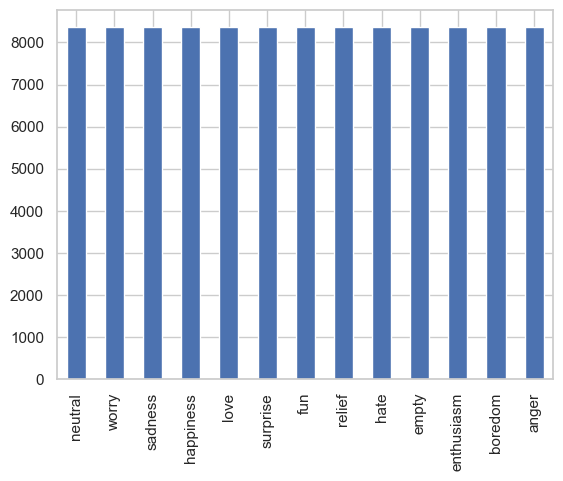

In [42]:
clean_df['sentiment'].value_counts().plot(kind='bar')

In [43]:
# cleaning the tweets using clean_tweet function

clean_df['clean_tweet'] = clean_df['content'].apply(lambda x: cleanTxt(x))

In [44]:
clean_df

,tweet_id,sentiment,content,content_token,synonim,clean_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",We want to trade with someone who has Houston...
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",No Topic Maps talks at the Balisage Markup Con...
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",i cant sleep
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",I missed the bl y bus
...,...,...,...,...,...,...
108623,NaN,anger,@mikeavila ack! I just read about your record...,NaN,NaN,ack I just read about your record that s ho...
108624,NaN,anger,@PirateTimmy hopefully it don't choke that al...,NaN,NaN,hopefully it don t choke that alir sometimes...
108625,NaN,anger,Working But it's Fridaaaayyyyy,NaN,NaN,Working But it s Fridaaaayyyyy
108626,NaN,anger,"And you could have it all, my empire of dirt!...",NaN,NaN,And you could have it all my empire of dirt ...


In [45]:
# lower casing clean_tweet column

clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: x.lower())

clean_df

,tweet_id,sentiment,content,content_token,synonim,clean_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",we want to trade with someone who has houston...
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",no topic maps talks at the balisage markup con...
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",i cant sleep
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",i missed the bl y bus
...,...,...,...,...,...,...
108623,NaN,anger,@mikeavila ack! I just read about your record...,NaN,NaN,ack i just read about your record that s ho...
108624,NaN,anger,@PirateTimmy hopefully it don't choke that al...,NaN,NaN,hopefully it don t choke that alir sometimes...
108625,NaN,anger,Working But it's Fridaaaayyyyy,NaN,NaN,working but it s fridaaaayyyyy
108626,NaN,anger,"And you could have it all, my empire of dirt!...",NaN,NaN,and you could have it all my empire of dirt ...


In [46]:
# function to remove stop words from clean_tweet column

def remove_stopwords(text):
    text = [word for word in text.split() if word not in stop]
    return " ".join(text)

In [47]:
# stopword removal

clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: remove_stopwords(x))

In [48]:
# function to lemmitize clean_tweet column

def lemmatization(text):
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [49]:
# lemmitization

clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: lemmatization(x))

In [50]:
# tokenization using word_tokenize

clean_df['clean_tweet_token'] = clean_df['clean_tweet'].apply(lambda x: word_tokenize(x))

clean_df

,tweet_id,sentiment,content,content_token,synonim,clean_tweet,clean_tweet_token
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket one,"[want, trade, someone, houston, ticket, one]"
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"[cant, fall, asleep]"
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"[topic, map, talk, balisage, markup, conferenc..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"[cant, sleep]"
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"[missed, bl, bus]"
...,...,...,...,...,...,...,...
108623,NaN,anger,@mikeavila ack! I just read about your record...,NaN,NaN,ack read record horrible accountancy taste,"[ack, read, record, horrible, accountancy, taste]"
108624,NaN,anger,@PirateTimmy hopefully it don't choke that al...,NaN,NaN,hopefully choke alir sometimes tone abdicate root,"[hopefully, choke, alir, sometimes, tone, abdi..."
108625,NaN,anger,Working But it's Fridaaaayyyyy,NaN,NaN,working fridaaaayyyyy,"[working, fridaaaayyyyy]"
108626,NaN,anger,"And you could have it all, my empire of dirt!...",NaN,NaN,could empire dirt inwards amp e pa freeze full...,"[could, empire, dirt, inwards, amp, e, pa, fre..."


FEATURES EXTRACTION

In [66]:
from sklearn.model_selection import train_test_split

# split data into train and test

X = clean_df['clean_tweet_token']
y = clean_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((86902,), (21726,), (86902,), (21726,))

In [67]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train.astype('U'))

X_test = vectorizer.transform(X_test.astype('U'))

X_train.shape, X_test.shape

((86902, 31071), (21726, 31071))

MODELING

In [68]:
# model training

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil perhitungan akurasi Data Train : {acc_train}')
print(f'Hasil perhitungan akurasi Data Test  : {acc_test}')

Hasil perhitungan akurasi Data Train : 0.7026650709995167
Hasil perhitungan akurasi Data Test  : 0.5518733314922213


EVALUASI

In [69]:
# evaluation

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       anger       0.72      0.98      0.83      1593
     boredom       0.68      0.95      0.80      1644
       empty       0.74      0.62      0.67      1711
  enthusiasm       0.58      0.72      0.64      1618
         fun       0.60      0.54      0.57      1678
   happiness       0.41      0.35      0.38      1665
        hate       0.68      0.70      0.69      1645
        love       0.48      0.46      0.47      1716
     neutral       0.34      0.20      0.25      1696
      relief       0.51      0.57      0.53      1667
     sadness       0.41      0.30      0.35      1660
    surprise       0.59      0.37      0.45      1728
       worry       0.33      0.46      0.39      1705

    accuracy                           0.55     21726
   macro avg       0.54      0.56      0.54     21726
weighted avg       0.54      0.55      0.54     21726



In [55]:
print(confusion_matrix(y_test, y_pred_test))

[[1561    8    0    2    2    1    2    0    0   10    0    0    7]
 [  10 1564    8   14    2    0   17    8    1   11    5    0    4]
 [  60  116 1057   80   39   25   58   28   30   73   39   44   62]
 [  41   54   31 1165   43   30   31   52   18   73   31   18   31]
 [  48   64   31  107  913  113   32   65   41  116   32   44   72]
 [  43   46   39  104  132  580   22  204  114  135   52   41  153]
 [  56   81   38   65   29    6 1144   20   17   37   46   34   72]
 [  38   39   35   90   78  159   39  797   77  118   56   68  122]
 [  71   50   34   69   68  173   44  127  339  100  128   53  440]
 [  43   79   33   79   65   76   52   90   47  945   39   39   80]
 [  75   81   51   75   38   68  108   66   75   62  502   62  397]
 [  83   73   56  114   70   89   84  117   61  137   77  635  132]
 [  44   33   21   43   41  107   56   71  176   52  227   46  788]]


TRY WITH SVC

In [56]:
# Model using Linear SVC

from sklearn.svm import LinearSVC

# Inisiasi LinearSVC

lsvc = LinearSVC()

# Fit model
lsvc.fit(X_train, y_train)

# Prediksi dengan data training

y_pred_train = lsvc.predict(X_train)

# Evaluasi akurasi data training

acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training

y_pred_test = lsvc.predict(X_test)

# Evaluasi akurasi data training

acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi

print(f'Hasil perhitungan akurasi Data Train : {acc_train}')

print(f'Hasil perhitungan akurasi Data Test  : {acc_test}')

Hasil perhitungan akurasi Data Train : 0.851671998342961
Hasil perhitungan akurasi Data Test  : 0.6367946239528676


In [57]:
# evaluation

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       anger       0.92      0.99      0.95      1593
     boredom       0.87      0.98      0.92      1644
       empty       0.71      0.77      0.74      1711
  enthusiasm       0.69      0.82      0.75      1618
         fun       0.67      0.71      0.69      1678
   happiness       0.49      0.42      0.45      1665
        hate       0.73      0.81      0.76      1645
        love       0.58      0.57      0.58      1716
     neutral       0.37      0.27      0.31      1696
      relief       0.60      0.68      0.64      1667
     sadness       0.47      0.40      0.43      1660
    surprise       0.61      0.57      0.59      1728
       worry       0.37      0.31      0.34      1705

    accuracy                           0.64     21726
   macro avg       0.62      0.64      0.63     21726
weighted avg       0.62      0.64      0.63     21726



In [58]:
print(confusion_matrix(y_test, y_pred_test))

[[1584    0    0    0    1    1    0    0    2    3    0    1    1]
 [   0 1607    9    4    2    0    5    3    2    4    6    1    1]
 [   7   26 1323   39   33   14   42   23   55   51   35   40   23]
 [  10   12   35 1329   32   29   18   19   22   49   25   20   18]
 [   5   19   32   65 1198   92   20   62   38   55   23   43   26]
 [  12   17   51   79  126  707   31  163  130  130   56   84   79]
 [  15   24   42   40   23    9 1327   15   19   23   41   31   36]
 [  14   13   40   72   65  145   35  985   67   81   58   77   64]
 [  22   25   83   65  102  153   43  123  465  107  144   89  275]
 [   7   29   50   58   53   75   40   69   36 1126   45   40   39]
 [  20   32   73   65   44   70  106   64  102   69  666  103  246]
 [  18   20   65   64   47   62   64   84   71   92   76  991   74]
 [  13   21   51   58   67   99   99   94  251   80  251   94  527]]


In [59]:
# Model using Logistic Regression

from sklearn.linear_model import LogisticRegression

# Inisiasi LogisticRegression

lr = LogisticRegression()

# Fit model

lr.fit(X_train, y_train)

# Prediksi dengan data training

y_pred_train = lr.predict(X_train)

# Evaluasi akurasi data training

acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training

y_pred_test = lr.predict(X_test)

# Evaluasi akurasi data training

acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi

print(f'Hasil perhitungan akurasi Data Train : {acc_train}')

print(f'Hasil perhitungan akurasi Data Test  : {acc_test}')

c:\Users\User\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hasil perhitungan akurasi Data Train : 0.7099606453246186
Hasil perhitungan akurasi Data Test  : 0.558501334806223


Dengan akurasi pada data test yang masih kurang, model ini belum bisa dianggap sebagai baik. 
TASK Selanjutnya untuk melakukan improvisasi model kita dapat melakukan beberapa optimasi seperti mengganti model, hyperparameter tuning, dsb.

Karena kasus saat ini merupakan text processing, sebelumnya kita sudah menggunakan 3 model untuk membuat baseline dan ternyata akurasi yang dihasilkan masih kurang dari kata baik. Kita dapat mencoba model lainnya guna memperoleh akurasi yang lebih baik.

In [71]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test,)